In [1]:
import os

ross_data_path = "./results/ross-results.csv"

path_100us = "./results/results-exp1-inet-slim/100us-interval"
path_500us = "./results/results-exp1-inet-slim/500us-interval"
path_1000us = "./results/results-exp1-inet-slim/1000us-interval"

jsons_100us = os.listdir(path_100us)
jsons_500us = os.listdir(path_500us)
jsons_1000us = os.listdir(path_1000us)

In [2]:
with open(ross_data_path, "r") as f:
    ross_data = [x.strip().split(',') for x in f]
    #ross_data = {ross_data[0][i]:[x[i] for x in ross_data[1:]] for i in range(len(ross_data[0]))}

i = 0
for lab, data in zip(ross_data[0], ross_data[1]):
    print(i, lab,":",data)
    i+=1

0 ﻿run_id : 0
1 generation_interval_us : 100
2 execution_time_s : 6.2798
3 simulator : ROSS
4 average_delay_ns : 152612388.2
5 jitter : 131453923.7
6 drop_rate : 0.219457257
7 total_events : 4165846


In [3]:
ross_plot_data_100 = {
    "execution_time": [float(x[2]) for x in ross_data if x[1] == '100'],
    "delay": [float(x[4]) for x in ross_data if x[1] == '100'],
    "jitter": [float(x[5]) for x in ross_data if x[1] == '100'],
    "drop_rate": [float(x[6]) for x in ross_data if x[1] == '100'],
}   

ross_plot_data_500 = {
    "execution_time": [float(x[2]) for x in ross_data if x[1] == '500'],
    "delay": [float(x[4]) for x in ross_data if x[1] == '500'],
    "jitter": [float(x[5]) for x in ross_data if x[1] == '500'],
    "drop_rate": [float(x[6]) for x in ross_data if x[1] == '500'],
}  

ross_plot_data_1000 = {
    "execution_time": [float(x[2]) for x in ross_data if x[1] == '1000'],
    "delay": [float(x[4]) for x in ross_data if x[1] == '1000'],
    "jitter": [float(x[5]) for x in ross_data if x[1] == '1000'],
    "drop_rate": [float(x[6]) for x in ross_data if x[1] == '1000'],
}  

ross_comb = [ross_plot_data_100, ross_plot_data_500, ross_plot_data_1000]

In [4]:
import json

def parse_repeat_experiments_INET(path, files):
    data = []
    for file in files:
        if file[0] !=".":
            with open(path+'/'+file, "r") as f:
                data.append(json.load(f))   

    return data      

def create_dict(data):
    inet_data = {x:list() for x in ross_plot_data_100.keys()}

    for d in data:
        inet_data['execution_time'].append(d['elapsed'])
        inet_data['jitter'].append(d['jitter'])
        inet_data['delay'].append(d['delay']['avg'])
        inet_data['drop_rate'].append(d["drop_rate"])
    
    return inet_data

data_100 = parse_repeat_experiments_INET(path_100us, jsons_100us)
inet_plot_data_100 = create_dict(data_100)

data_500 = parse_repeat_experiments_INET(path_500us, jsons_500us)
inet_plot_data_500 = create_dict(data_500)

data_1000 = parse_repeat_experiments_INET(path_1000us, jsons_1000us)
inet_plot_data_1000 = create_dict(data_1000)

inet_comb = [inet_plot_data_100, inet_plot_data_500, inet_plot_data_1000]

In [5]:
def plot_double_bar_special(ax, position, a, b, fontsize=8, flag=None, **kwargs):
    """
    Plot two bars next to each other on the given axes object.

    Parameters:
        ax (matplotlib.axes.Axes): The axes object to plot on.
        position (float): The position for the bars.
        a (float): Value for the first bar.
        b (float): Value for the second bar.
    """
    # Define the width of each bar
    bar_width = 0.35

    # Calculate the positions for the bars
    bar1_pos = position - bar_width / 2
    bar2_pos = position + bar_width / 2

    # Plot the bars
    ax.bar(bar1_pos, a, bar_width, label='A', color='blue', zorder=2)
    ax.bar(bar2_pos, b, bar_width, label='B', color='green', zorder=2)

    
    offsets = (0, 0) if "offsets" not in kwargs else kwargs["offsets"]

    ax.text(bar1_pos + bar_width / 2 - offsets[0], a, str(round(a,3)), color='k',ha='right', va='bottom', fontsize=fontsize, rotation=90)
    if flag:
        ax.text(bar2_pos + bar_width / 2 + offsets[1], b, str(round(b,3)), color='w',ha='right', va='top', fontsize=fontsize, rotation=90)
    else:
        ax.text(bar2_pos + bar_width / 2 + offsets[1], b, str(round(b,3)), color='k',ha='right', va='bottom', fontsize=fontsize, rotation=90)

    #ax.legend()

def plot_double_bar(ax, position, a, b, fontsize=8, flag=None, **kwargs):
    """
    Plot two bars next to each other on the given axes object.

    Parameters:
        ax (matplotlib.axes.Axes): The axes object to plot on.
        position (float): The position for the bars.
        a (float): Value for the first bar.
        b (float): Value for the second bar.
    """
    # Define the width of each bar
    bar_width = 0.35

    # Calculate the positions for the bars
    bar1_pos = position - bar_width / 2
    bar2_pos = position + bar_width / 2

    # Plot the bars
    ax.bar(bar1_pos, a, bar_width, label='A', color='blue', zorder=2)
    ax.bar(bar2_pos, b, bar_width, label='B', color='green', zorder=2)

    
    offsets = (0, 0) if "offsets" not in kwargs else kwargs["offsets"]

    ax.text(bar1_pos + bar_width / 2 - offsets[0], a, str(round(a,3)), color='w',ha='right', va='top', fontsize=fontsize, rotation=90)
    ax.text(bar2_pos + bar_width / 2 + offsets[1], b, str(round(b,3)), color='w',ha='right', va='top', fontsize=fontsize, rotation=90)

    #ax.legend()

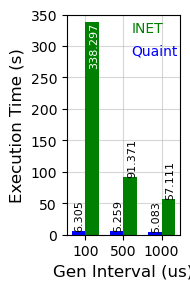

In [6]:
import matplotlib.pyplot as plt
import statistics as st

x_title = "Gen Interval (us)"
y_title = "Execution Time (s)"
plotting_variable = "execution_time"

# Example usage:
# Create a figure and axes object
fig, ax = plt.subplots()
fig.set_figwidth(2)
fig.set_figheight(3)

flag_first_line=True
pos = 0
for ross, inet in zip(ross_comb, inet_comb):
    # Call the function to plot the double bar
    plot_double_bar_special(ax, pos, st.mean(ross[plotting_variable]), st.mean(inet[plotting_variable]), offsets=(0.02,0.02),flag=flag_first_line)
    pos += 1
    flag_first_line = None

ax.set_xticks([0,1,2], labels=[100, 500, 1000])
ax.set_ylim(0,350)

# Set labels and legend
ax.set_ylabel(y_title, fontsize=12)
ax.set_xlabel(x_title, fontsize=12)

ax.text(0.57, 0.82, f'Quaint', color='blue', transform=ax.transAxes, fontsize=10)
ax.text(0.57, 0.92, f'INET', color='green', transform=ax.transAxes, fontsize=10)

ax.set_xticks([0,1,2], labels=[100, 500, 1000])

ax.grid(alpha=.5)

plt.tight_layout()
plt.savefig("figures/execution.pdf", format='pdf')
plt.show()

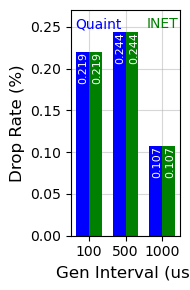

In [7]:
import matplotlib.pyplot as plt
import statistics as st

x_title = "Gen Interval (us)"
y_title = "Drop Rate (%)"
plotting_variable = "drop_rate"


# Example usage:
# Create a figure and axes object
fig, ax = plt.subplots()

fig.set_figwidth(2)
fig.set_figheight(3)

pos = 0
for ross, inet in zip(ross_comb, inet_comb):
    # Call the function to plot the double bar
    plot_double_bar(ax, pos, st.mean(ross[plotting_variable]), st.mean(inet[plotting_variable]), offsets=(.01,0.01))
    pos += 1

ax.set_xticks([0,1,2], labels=[100, 500, 1000])
ax.set_ylim(0,.27)

# Set labels and legend
ax.set_ylabel(y_title, fontsize=12)
ax.set_xlabel(x_title, fontsize=12)

ax.text(0.04, 0.92, f'Quaint', color='blue', transform=ax.transAxes, fontsize=10)
ax.text(0.69, 0.92, f'INET', color='green', transform=ax.transAxes, fontsize=10)

ax.set_xticks([0,1,2], labels=[100, 500, 1000])

ax.grid(alpha=.5)

plt.tight_layout()
plt.savefig("figures/drop_rate.pdf", format='pdf')
# Show the plot
plt.show()

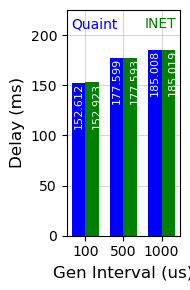

In [8]:
import matplotlib.pyplot as plt
import statistics as st

x_title = "Gen Interval (us)"
y_title = "Delay (ms)"
plotting_variable = "delay"


# Example usage:
# Create a figure and axes object
fig, ax = plt.subplots()

fig.set_figwidth(2)
fig.set_figheight(3)

pos = 0
for ross, inet in zip(ross_comb, inet_comb):
    # Call the function to plot the double bar
    plot_double_bar(ax, pos, st.mean(ross[plotting_variable])/1_000_000, st.mean(inet[plotting_variable])/1_000_000, offsets=(0.04,0.08))
    pos += 1

ax.set_ylim(0,225)


# Set labels and legend
ax.set_ylabel(y_title, fontsize=12)
ax.set_xlabel(x_title, fontsize=12)

ax.text(0.04, 0.92, f'Quaint', color='blue', transform=ax.transAxes, fontsize=10)
ax.text(0.69, 0.92, f'INET', color='green', transform=ax.transAxes, fontsize=10)

ax.set_xticks([0,1,2], labels=[100, 500, 1000])

ax.grid(alpha=.5)

plt.tight_layout()

plt.savefig("figures/delay.pdf", format='pdf')
plt.show()

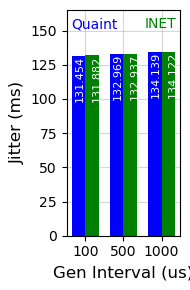

In [9]:
import matplotlib.pyplot as plt
import statistics as st

x_title = "Gen Interval (us)"
y_title = "Jitter (ms)"
plotting_variable = "jitter"


# Example usage:
# Create a figure and axes object
fig, ax = plt.subplots()

fig.set_figwidth(2)
fig.set_figheight(3)

pos = 0
for ross, inet in zip(ross_comb, inet_comb):
    # Call the function to plot the double bar
    plot_double_bar(ax, pos, st.mean(ross[plotting_variable])/1_000_000, st.mean(inet[plotting_variable])/1_000_000, offsets=(0.01,0.08))
    pos += 1

ax.set_ylim(0,165)

# Set labels and legend
ax.set_ylabel(y_title, fontsize=12)
ax.set_xlabel(x_title, fontsize=12)

ax.text(0.04, 0.92, f'Quaint', color='blue', transform=ax.transAxes, fontsize=10)
ax.text(0.69, 0.92, f'INET', color='green', transform=ax.transAxes, fontsize=10)

ax.set_xticks([0,1,2], labels=[100, 500, 1000])

ax.grid(alpha=.5)

plt.tight_layout()
plt.savefig("figures/jitter.pdf", format='pdf')
# Show the plot
plt.show()


In [10]:
import pandas
import statistics as st
import matplotlib.pyplot as plt

def parse_file(path, label='runtime'):
    results = pandas.read_csv(path)

    no_pe = results['total_pe'].to_list()
    rt = results[label].to_list()

    results = {key: list() for key in sorted(no_pe)}

    for pe, rt in zip(no_pe, rt):
        results[pe].append(rt)

    results = {key: st.mean(value) for key, value in results.items()}

    return results

def add_line(results, ax, label, color, marker='o'):    
    x = [x for x in results.keys()]
    y = [x for x in results.values()]

    # Plot the line chart with dot markers
    ax.plot(x, y, marker=marker, linestyle='-', markersize=6, label=label, color=color)

    if label != "":
        ax.legend()

def plot_line_chart(plot_data, x_y_titles, save_name, xlim=[0,62], ylim_top=None, figwidth=3.5, ticks=None, tick_labels=None):
    # Create figure and axes objects
    fig, ax = plt.subplots()
    fig.set_figwidth(figwidth)
    fig.set_figheight(3)

    for data in plot_data:
        results = parse_file(data['path'], label=data['col'])
        if 'marker' in data:
            add_line(results, ax, data['label'], data['color'], data['marker'])
        else:
            add_line(results, ax, data['label'], data['color'])

    ax.set_ylabel(x_y_titles[1], fontsize=14)
    ax.set_xlabel(x_y_titles[0],fontsize=14)


    # Show grid
    ax.grid(alpha=.5)

    if ticks:
        ax.set_xticks(ticks=ticks, labels=tick_labels) # [2,4,8,16,32,64]

    #ax.set_xscale('log')
    # Show the plot
    plt.tight_layout()
    plt.xlim(xlim)
    plt.ylim(bottom=0)  # Set the lower limit to 0
    if ylim_top:
        plt.ylim(top=ylim_top)
    plt.savefig(f"{save_name}", format='pdf')
    plt.show()


In [11]:
# path: the path to the result file
# col: which column you want to plot (average of all repeats per number of pes)
# lable: the label for the line
plot_data = [
    {
        "path": "./results/ross-results-csv-cleaned/ross-v-e-weights-pkt.csv",
        "col": "runtime",
        "label": "vertex + edge",
        "color": 'g',
        "marker": 'o'
    },
    {
        "path": "./results/ross-results-csv-cleaned/ross-vertex-weights-pkt.csv",
        "col": "runtime",
        "label": "vertex-throughput",
        "color": 'c',
        "marker": '+'
    },
    {
        "path": "./results/ross-results-csv-cleaned/ross-vertex-weights-event.csv",
        "col": "runtime",
        "label": "vertex-event",
        "color": 'm',
        "marker": 'x'
    },
    {
        "path": "./results/ross-results-csv-cleaned/ross-no-weights.csv",
        "col": "runtime",
        "label": "no-weights",
        "color": 'y',
        "marker": 'd'
    },
    {
        "path": "./results/ross-results-csv-cleaned/ross-edge-weights.csv",
        "col": "runtime",
        "label": "edge",
        "color": 'b',
        "marker": '^'
    }
    
]

x_title = "No. processes"
y_title = "Runtime (s)"

x_y_titles = [x_title, y_title]

#save_name = "fig1.pdf"

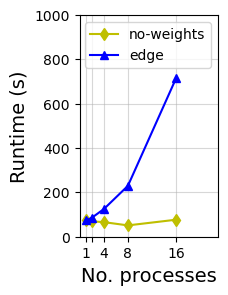

In [12]:
plot_line_chart([plot_data[3],plot_data[4]], x_y_titles, "./figures/scale-edge-3-2.3.pdf",
                xlim=[0,23], ylim_top=1000, figwidth=2.3,ticks=[1,2,4,8,16],tick_labels=[1,'',4,8,16])
#plot_line_chart([plot_data[4]], x_y_titles, "./figures/scale-edge-3-2-original.pdf",xlim=[0,20], figwidth=2)

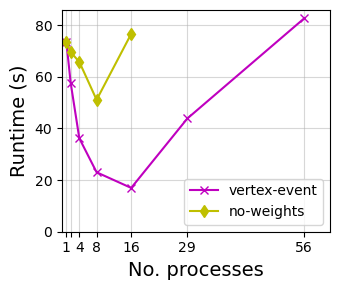

In [13]:
plot_line_chart([plot_data[2],plot_data[3]], x_y_titles, "./figures/scale-weights-3-3.5.pdf", 
                ticks=[1,2,4,8,16,29,56], tick_labels=[1,'',4,8,16,29,56])
#plot_line_chart([plot_data[2],plot_data[3]], x_y_titles, "./figures/scale-weights-3-3.5-original.pdf")

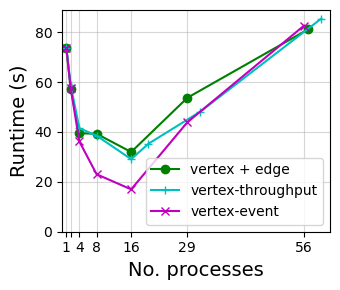

In [14]:
plot_line_chart(plot_data[:3], x_y_titles, "./figures/scale-estimate-3-3.5.pdf",
               ticks=[1,2,4,8,16,29,56], tick_labels=[1,'',4,8,16,29,56]
               )

#plot_line_chart(plot_data[:3], x_y_titles, "./figures/scale-estimate-3-3.5-original.pdf")


In [15]:
plot_data_2 = [
    {
        "path": "./results/ross-results-csv-cleaned/ross-no-weights.csv",
        "col1": "percent_net",
        "col2": "events_rb",
        "col3": "rb_total",
        "label": "no-weights",
        "color": 'y',
        "marker": 'd',
        "linestyle": ':'
    },
    {
        "path": "./results/ross-results-csv-cleaned/ross-edge-weights.csv",
        "col1": "percent_net",
        "col2": "events_rb",
        "col3": "rb_total",
        "label": "edge",
        "color": 'b',
        "marker": '^',
        "linestyle": '-'
    }
]

plot_data_3 = [
    {
        "path": "./results/ross-results-csv-cleaned/ross-v-e-weights-pkt.csv",
        "col1": "percent_net",
        "col2": "events_rb",
        "col3": "rb_total",
        "label": "vertex + edge",
        "color": 'g',
        "marker": 'o',
        "linestyle": '-'
    },
    {
        "path": "./results/ross-results-csv-cleaned/ross-vertex-weights-pkt.csv",
        "col1": "percent_net",
        "col2": "events_rb",
        "col3": "rb_total",
        "label": "vertex-throughput",
        "color": 'c',
        "marker": '+',
        "linestyle": '--'
    },
    {
        "path": "./results/ross-results-csv-cleaned/ross-vertex-weights-event.csv",
        "col1": "percent_net",
        "col2": "events_rb",
        "col3": "rb_total",
        "label": "vertex-event",
        "color": 'm',
        "marker": 'x',
        "linestyle": ':'
    },
]

x_title_2 = "No. processes"
y_title_2 = "Inter-partition messages (%)"
y_title_2nd_2 = "Events per rollback"
x_y_titles_2 = [x_title_2, y_title_2, y_title_2nd_2]

In [16]:
import numpy as np

bars_data = {}
lines_data = {}
style = {}
labels = []
linestyles = []
suffix = '-line'
keys = None
for data in plot_data_2:
    results = parse_file(data['path'], label=data['col1'])
    results.pop(1, None) # We don't need the results of 1 process
    
    values_arr = np.array(list(results.items()))
    values_arr = values_arr[values_arr[:, 0].argsort()]
    
    # Make sure all data has the same list of number-of-processes)
    if keys is None:
        keys = list(values_arr[:, 0])
    else:
        assert(keys == list(values_arr[:, 0]))
    bars_data[data['label']] = tuple(values_arr[:,1])
    
    style[data['label']] = {'color': data['color'], 'marker': data['marker']}
    labels.append(data['label'])
    linestyles.append(data['linestyle'])


for data in plot_data_2:
    results_2 = parse_file(data['path'], label=data['col2'])
    results_3 = parse_file(data['path'], label=data['col3'])
    results_2.pop(1, None) # We don't need the results of 1 process
    results_3.pop(1, None) # We don't need the results of 1 process
    print(results_3)
    
    values_arr_2 = np.array(list(results_2.items()))
    values_arr_2 = values_arr_2[values_arr_2[:, 0].argsort()]
    
    values_arr_3 = np.array(list(results_3.items()))
    values_arr_3 = values_arr_3[values_arr_3[:, 0].argsort()]
    
    # Make sure all data has the same list of number-of-processes)
    if keys is None:
        keys = list(values_arr_2[:, 0])
    else:
        assert(keys == list(values_arr_3[:, 0]))
        pass
    lines_data[data['label']+suffix] = tuple(values_arr_2[:,1]/values_arr_3[:,1])
    
    
lines_data

{2: 1053305, 4: 1676768.6, 8: 1712776, 16: 1917409.6}
{2: 986184, 4: 1450118.2, 8: 1263941.4, 16: 1428518.8}


{'no-weights-line': (10.880856731905764,
  13.343563685531802,
  15.949659383363615,
  30.125541251071237),
 'edge-line': (19.072539810015172,
  38.89781812268821,
  104.22126358073247,
  204.1271195030825)}

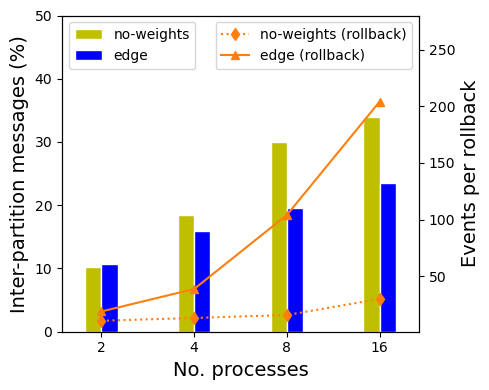

In [17]:
save_name = "figures/rb-edge.pdf"

import pandas as pd
width = .35 # width of a bar

merged_dict = {**lines_data, **bars_data}
data_df = pd.DataFrame(merged_dict)

# Plot bars
ax1 = data_df[labels].plot(kind='bar', width=width, edgecolor='white', color=[style[l]['color'] for l in labels])
ax1.set_ylim(top=50)
#style[l]['color'] for l in labels

ax1.set_xlabel(x_y_titles_2[0], fontsize=14)
ax1.set_ylabel(x_y_titles_2[1], fontsize=14)
# ax1.set_ylim(0,100)
ax1.legend(loc='upper left')
plt.xticks(rotation=360)

ax2 = ax1.twinx()

# Plot lines
for l, s in zip(labels, linestyles):
    data_df[l+suffix].plot(ax=ax2,color='tab:orange',linestyle=s, marker=style[l]['marker'])


# plt.xlim([-width, len(data_df['edge'])-width])
ax2.set_ylim(top=280)
ax2.set_xticklabels([int(k) for k in keys])
ax2.set_ylabel(x_y_titles_2[2], fontsize=14)
ax2.legend([l+" (rollback)" for l in labels],loc='upper right', ncols=1)

fig = plt.gcf()
fig.set_figwidth(5)
fig.set_figheight(4)
# plt.xlim(xlim)
# plt.ylim(bottom=0)  # Set the lower limit to 0
# if ylim_top:
#     plt.ylim(top=ylim_top)
plt.tight_layout()
plt.savefig(f"{save_name}", format='pdf')
plt.show()

In [18]:
plot_data_3 = [
    {
        "path": "./results/ross-results-csv-cleaned/ross-no-weights.csv",
        "col1": "percent_net",
        "col2": "events_rb",
        "col3": "rb_total",
        "label": "no-weights",
        "color": 'y',
        "marker": 'd',
        "linestyle": '--'
    },
    {
        "path": "./results/ross-results-csv-cleaned/ross-vertex-weights-event.csv",
        "col1": "percent_net",
        "col2": "events_rb",
        "col3": "rb_total",
        "label": "vertex-event",
        "color": 'm',
        "marker": 'x',
        "linestyle": ':'
    },
]

x_title_3 = "No. processes"
y_title_3 = "Inter-partition messages (%)"
y_title_2nd_3 = "Events per rollback"
x_y_titles_3 = [x_title_3, y_title_3, y_title_2nd_3]

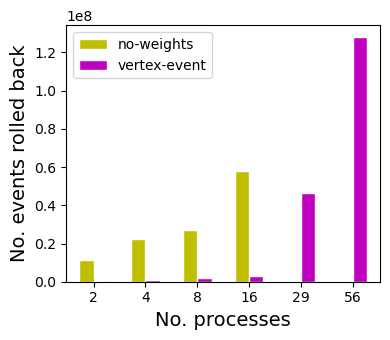

In [19]:
save_name = "figures/rb-vertex.pdf"

def parse_bars_data(plot_d, col):
    res = []
    for data in plot_d:
        results = parse_file(data['path'], label=data[col])
        results.pop(1, None) # We don't need the results of 1 process
        
        results_arr = np.array(list(results.items()))
        results_arr = results_arr[results_arr[:, 0].argsort()]
        res.append(results_arr)
    return res

bars = parse_bars_data(plot_data_3, 'col2')

new_row = np.array([[29,0],[56,0]])
bars[0] = np.vstack([bars[0], new_row])

#lines = parse_bars_data(plot_data_3, 'col1')

bars[0][:,1]
bars[1][:,1]
labels = bars[0][:,0]
bars_df = pd.DataFrame({"no-weights":bars[0][:,1], "vertex-event":bars[1][:,1]})

width=.55
ax1 = bars_df.plot(kind='bar',width=width, edgecolor='white', color=['y','m'])
#ax1.set_ylim(top=50)

ax1.set_xlabel(x_y_titles_2[0], fontsize=14)
ax1.set_ylabel('No. events rolled back', fontsize=14)
# ax1.set_ylim(0,100)
plt.xticks(rotation=360)
ax1.set_xticklabels([int(k) for k in labels])

fig = plt.gcf()
fig.set_figwidth(4)
fig.set_figheight(3.5)
# plt.xlim(xlim)
# plt.ylim(bottom=0)  # Set the lower limit to 0
# if ylim_top:
#     plt.ylim(top=ylim_top)
plt.ticklabel_format(axis='y', style='sci', scilimits=(0, 0))
plt.tight_layout()
plt.savefig(f"{save_name}", format='pdf')
plt.show()
